# Mini Project 2 : Semi-structured Data Processing

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

#### Dataset 1: Laureates

In [3]:
# Read data from the file
with open('laureate.json') as f:
    data = json.load(f)

# Extract laureates information
laureates = data['laureates']

# Create lists to store data
ids, firstnames, surnames, borns, dieds, bornCountries, bornCountryCodes, bornCities, diedCountries, diedCountryCodes, diedCities, genders, prizes = [], [], [], [], [], [], [], [], [], [], [], [], []

# Loop through laureates and prizes
for laureate in laureates:
    # Extract laureate information
    ids.append(laureate['id'])
    firstnames.append(laureate['firstname'])
    surnames.append(laureate.get('surname', '-'))
    borns.append(laureate.get('born', 'Unknown'))
    dieds.append(laureate.get('died', 'Unknown'))
    bornCountries.append(laureate.get('bornCountry', 'Unknown'))
    bornCountryCodes.append(laureate.get('bornCountryCode', 'Unknown'))
    bornCities.append(laureate.get('bornCity', 'Unknown'))
    diedCountries.append(laureate.get('diedCountry', 'Unknown'))
    diedCountryCodes.append(laureate.get('diedCountryCode', 'Unknown'))
    diedCities.append(laureate.get('diedCity', 'Unknown'))
    genders.append(laureate['gender'])

    # Extract prize information
    laureate_prizes = laureate.get('prizes', [])
    for prize in laureate_prizes:
        prizes.append({
            'laureate_id': laureate['id'],
            'year': prize['year'],
            'category': prize['category'],
            'share': prize['share'],
            'motivation': prize['motivation'],
            'affiliations': prize.get('affiliations', [])
        })

# Create laureates DataFrame
df_laureates = pd.DataFrame({
    'id': ids,
    'firstname': firstnames,
    'surname': surnames,
    'born': borns,
    'died': dieds,
    'bornCountry': bornCountries,
    'bornCountryCode': bornCountryCodes,
    'bornCity': bornCities,
    'diedCountry': diedCountries,
    'diedCountryCode': diedCountryCodes,
    'diedCity': diedCities,
    'gender': genders
})

# Create prizes DataFrame
df_prizes = pd.DataFrame(prizes)


In [4]:
# Display the top 5 rows of the DataFrame
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,Unknown,male
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,Unknown,male
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male


In [5]:
# Display the bottom 5 rows of the DataFrame
df_laureates.tail()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender
987,1030,Louis,Brus,1943-00-00,0000-00-00,USA,US,"Cleveland, OH",Unknown,Unknown,Unknown,male
988,1031,Aleksey,Yekimov,1945-00-00,0000-00-00,USSR (now Russia),RU,Unknown,Unknown,Unknown,Unknown,male
989,1032,Jon,Fosse,1959-09-29,0000-00-00,Norway,NO,Haugesund,Unknown,Unknown,Unknown,male
990,1033,Narges,Mohammadi,1972-04-21,0000-00-00,Iran,IR,Zanjan,Unknown,Unknown,Unknown,female
991,1034,Claudia,Goldin,1946-00-00,0000-00-00,USA,US,"New York, NY",Unknown,Unknown,Unknown,female


In [6]:
df_laureates.shape

(992, 12)

#### Dataset 2: Prize

In [7]:
import pandas as pd
import json

# Load JSON data from the file
with open('prize.json', 'r') as file:
    data = json.load(file)

# Flatten the JSON structure
flattened_data = []
for prize in data.get('prizes', []):
    for laureate in prize.get('laureates', []):
        flattened_data.append({
            'year': prize.get('year', 'Unknown'),
            'category': prize.get('category', 'Unknown'),
            'laureate_id': laureate.get('id', 'Unknown'),
            'firstname': laureate.get('firstname', '-'),
            'surname': laureate.get('surname', '-'),
            'motivation': laureate.get('motivation', 'Unknown'),
            'share': laureate.get('share', 'Unknown')
        })

# Create a DataFrame
df_prize = pd.DataFrame(flattened_data)

In [8]:
# Display the top 5 rows of the DataFrame
df_prize.head()

,year,category,laureate_id,firstname,surname,motivation,share
0,2023,chemistry,1029,Moungi,Bawendi,"""for the discovery and synthesis of quantum dots""",3
1,2023,chemistry,1030,Louis,Brus,"""for the discovery and synthesis of quantum dots""",3
2,2023,chemistry,1031,Aleksey,Yekimov,"""for the discovery and synthesis of quantum dots""",3
3,2023,economics,1034,Claudia,Goldin,"""for having advanced our understanding of wome...",1
4,2023,literature,1032,Jon,Fosse,"""for his innovative plays and prose which give...",1


In [9]:
# Display the bottom 5 rows of the DataFrame
df_prize.tail()

,year,category,laureate_id,firstname,surname,motivation,share
995,1901,literature,569,Sully,Prudhomme,"""in special recognition of his poetic composit...",1
996,1901,peace,462,Henry,Dunant,"""for his humanitarian efforts to help wounded ...",2
997,1901,peace,463,Frédéric,Passy,"""for his lifelong work for international peace...",2
998,1901,physics,1,Wilhelm Conrad,Röntgen,"""in recognition of the extraordinary services ...",1
999,1901,medicine,293,Emil,von Behring,"""for his work on serum therapy, especially its...",1


In [10]:
df_prize.shape

(1000, 7)

### 1. Process one collection of data and summarize information from several fields
#### Dataset 1: df_laureates

In [11]:
# Display the top 5 rows of the DataFrame
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,Unknown,male
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,Unknown,male
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male


In [12]:
# Dropping the unnecessary columns
df_laureates = df_laureates.drop(['bornCountryCode', 'diedCountryCode'], axis=1)

In [13]:
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Lennep (now Remscheid),Germany,Munich,male
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,Arnhem,the Netherlands,Unknown,male
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,Zonnemaire,the Netherlands,Amsterdam,male
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,Paris,France,Unknown,male
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,Paris,France,Paris,male


In [14]:
# Description of the columns of df_laureates:

# id: Unique identifier for each laureate.
# firstname: First name of the laureate.
# surname: Last name or surname of the laureate.
# born: Date of birth of the laureate.
# died: Date of death of the laureate.
# bornCountry: Country where the laureate was born.
# bornCity: City where the laureate was born.
# diedCountry: Country where the laureate died.
# diedCity: City where the laureate died.
# gender: Gender of the laureate.

In [15]:
# Extract the year part from the column 'born' and create a new column 'birth year'
df_laureates['birth_year'] = df_laureates['born'].str[:4]
# Extract the year part from the column 'died' and create a new column 'birth year'
df_laureates['death_year'] = df_laureates['died'].str[:4]

# View the updated df
df_laureates[['firstname', 'surname', 'born', 'birth_year', 'death_year']].head()

,firstname,surname,born,birth_year,death_year
0,Wilhelm Conrad,Röntgen,1845-03-27,1845,1923
1,Hendrik A.,Lorentz,1853-07-18,1853,1928
2,Pieter,Zeeman,1865-05-25,1865,1943
3,Henri,Becquerel,1852-12-15,1852,1908
4,Pierre,Curie,1859-05-15,1859,1906


In [16]:
# Try to convert to numeric and identify non-convertible values
non_numeric_birth_year = df_laureates[pd.to_numeric(df_laureates['birth_year'], errors='coerce').isna()]
non_numeric_death_year = df_laureates[pd.to_numeric(df_laureates['death_year'], errors='coerce').isna()]

# Display rows with non-convertible values
print("Rows with non-integer values in 'birth_year':")
print(non_numeric_birth_year)

print("\nRows with non-integer values in 'death_year':")
print(non_numeric_death_year)


Rows with non-integer values in 'birth_year':
      id                  firstname surname     born        died bornCountry  \
891  925  National Dialogue Quartet       -  Unknown  0000-00-00     Unknown   

    bornCity diedCountry diedCity gender birth_year death_year  
891  Unknown     Unknown  Unknown    org       Unkn       0000  

Rows with non-integer values in 'death_year':
Empty DataFrame
Columns: [id, firstname, surname, born, died, bornCountry, bornCity, diedCountry, diedCity, gender, birth_year, death_year]
Index: []


In [17]:
# Replace non-integer values with NaN
df_laureates['birth_year'] = pd.to_numeric(df_laureates['birth_year'], errors='coerce')
df_laureates['death_year'] = pd.to_numeric(df_laureates['death_year'], errors='coerce')

# Convert to integers, treating NaN as 0
df_laureates['birth_year'] = df_laureates['birth_year'].fillna(0).astype(int)
df_laureates['death_year'] = df_laureates['death_year'].fillna(0).astype(int)

In [18]:
rows_with_zero_values = df_laureates[(df_laureates['birth_year'] == 0)]
print(rows_with_zero_values)

      id                  firstname surname     born        died bornCountry  \
891  925  National Dialogue Quartet       -  Unknown  0000-00-00     Unknown   

    bornCity diedCountry diedCity gender  birth_year  death_year  
891  Unknown     Unknown  Unknown    org           0           0  


In [19]:
df_laureates.shape

(992, 12)

In [20]:
# The dataset reveals instances where only the birth year of laureates is available in the 'born' column, 
# leading to the replacement of the month and day components with '00-00' to indicate this partial information. 
# Also, certain entries in the 'died' column are represented as '0000-00-00,' 
# suggesting either that the laureate is still alive or that the information about their death is unknown.

In [21]:
df_laureates.dtypes

id             object
firstname      object
surname        object
born           object
died           object
bornCountry    object
bornCity       object
diedCountry    object
diedCity       object
gender         object
birth_year      int64
death_year      int64
dtype: object

In [22]:
# As we can see, the coulmns 'born' and 'died' has the data type objects and not date and time

In [23]:
# Converting 'born' and 'died' to datetime columns
df_laureates['born'] = pd.to_datetime(df_laureates['born'], errors='coerce')
df_laureates['died'] = pd.to_datetime(df_laureates['died'], errors='coerce')

In [24]:
df_laureates.dtypes

id                     object
firstname              object
surname                object
born           datetime64[ns]
died           datetime64[ns]
bornCountry            object
bornCity               object
diedCountry            object
diedCity               object
gender                 object
birth_year              int64
death_year              int64
dtype: object

In [25]:
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Lennep (now Remscheid),Germany,Munich,male,1845,1923
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,Arnhem,the Netherlands,Unknown,male,1853,1928
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,Zonnemaire,the Netherlands,Amsterdam,male,1865,1943
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,Paris,France,Unknown,male,1852,1908
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,Paris,France,Paris,male,1859,1906


In [26]:
# Check for NaT values in the "born" column
na_values_b = df_laureates['born'].isna()
# Count the number of NaT values in the column
count_na_b = na_values_b.sum()

# Check for NaT values in the "died" column
na_values_d = df_laureates['died'].isna()
# Count the number of NaT values in the column
count_na_d = na_values_d.sum()

print("NaT values in 'born':", count_na_b)
print("NaT values in 'died':", count_na_d)

NaT values in 'born': 42
NaT values in 'died': 331


In [27]:
# The presence of NaT values in the dataset is attributed to inconsistencies in the data, 
# such as instances where only the birth year is provided, uncertainties about the death year, 
# or when information about whether the individual is deceased is unknown.

#### Analysis 1: Average age at death for those who have died

In [28]:
# Calculating age at death and creating a column
#df_laureates['age_at_death'] = (df_laureates['died'] - df_laureates['born']).dt.total_seconds() / (365.25 * 24 * 3600)
df_laureates['age_at_death'] = np.floor((df_laureates['died'] - df_laureates['born']).dt.total_seconds() / (365.25 * 24 * 3600))

#View the Dataframe
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year,age_at_death
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Lennep (now Remscheid),Germany,Munich,male,1845,1923,77.0
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,Arnhem,the Netherlands,Unknown,male,1853,1928,74.0
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,Zonnemaire,the Netherlands,Amsterdam,male,1865,1943,78.0
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,Paris,France,Unknown,male,1852,1908,55.0
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,Paris,France,Paris,male,1859,1906,46.0


In [29]:
# Filter those who have died
died_entries = df_laureates.dropna(subset=['died'])

# Calculate average age at death
average_age_at_death = died_entries['age_at_death'].mean()
print("Average Age at Death:", average_age_at_death)

Average Age at Death: 80.31515151515151


In [30]:
# Calculate min and max age at death
min_age_at_death = df_laureates['age_at_death'].min()
max_age_at_death = df_laureates['age_at_death'].max()

print("Minimum Age at Death:", min_age_at_death)
print("Maximum Age at Death:", max_age_at_death)

Minimum Age at Death: 39.0
Maximum Age at Death: 103.0


#### Analysis 2: Count of entries by gender and organisation

In [31]:
gender_counts = df_laureates['gender'].value_counts()
print("Gender Counts:")
gender_counts

Gender Counts:


gender
male      901
female     64
org        27
Name: count, dtype: int64

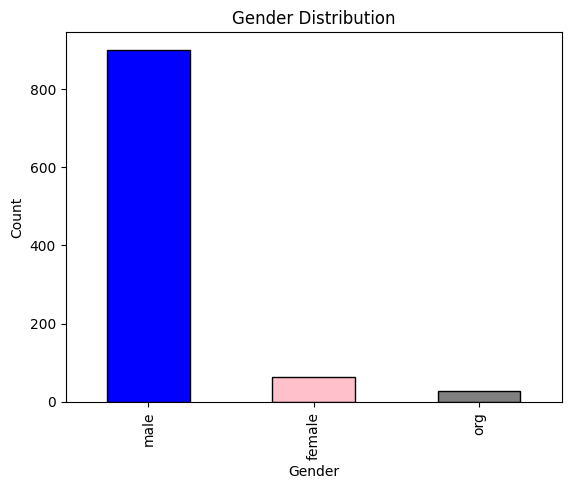

In [32]:
# Plotting the gender counts
gender_counts.plot(kind='bar', color=['blue', 'pink', 'gray'], edgecolor='black')

# Adding labels and title
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Display the plot
plt.show()

In [33]:
# The gender distribution among Nobel laureates reveals a significant historical gender imbalance, 
# with a notable predominance of male recipients (901) compared to female laureates (64). 
# The inclusion of the "org" category (27) recognizes organizations, 
# highlighting a nuanced approach to gender representation beyond binary classifications.

#### Dataset 2: df_prize

In [34]:
# Display the top 5 rows of the DataFrame
df_prize.head()

,year,category,laureate_id,firstname,surname,motivation,share
0,2023,chemistry,1029,Moungi,Bawendi,"""for the discovery and synthesis of quantum dots""",3
1,2023,chemistry,1030,Louis,Brus,"""for the discovery and synthesis of quantum dots""",3
2,2023,chemistry,1031,Aleksey,Yekimov,"""for the discovery and synthesis of quantum dots""",3
3,2023,economics,1034,Claudia,Goldin,"""for having advanced our understanding of wome...",1
4,2023,literature,1032,Jon,Fosse,"""for his innovative plays and prose which give...",1


In [35]:
# Description of the columns of df_prize:

# year: The year in which the prize was awarded.
# category: The category of the prize (e.g., physics, chemistry, peace, etc.).
# laureate_id: Unique identifier for the laureate who received the prize.
# firstname: First name of the laureate.
# surname: Last name or surname of the laureate.
# motivation: The motivation or reason for awarding the prize.
# share: The share or number of laureates who shared the prize.

#### Analysis 1: Category Distribution

In [36]:
# Get category distribution as a DataFrame
category_distribution_df = df_prize['category'].value_counts().reset_index()

# Rename columns for better clarity
category_distribution_df.columns = ['Category', 'Count of prizes']

category_distribution_df = category_distribution_df.set_index('Category')

# Display the DataFrame
category_distribution_df

,Count of prizes
Category,
medicine,227
physics,225
chemistry,194
peace,141
literature,120
economics,93


<Figure size 1000x600 with 0 Axes>

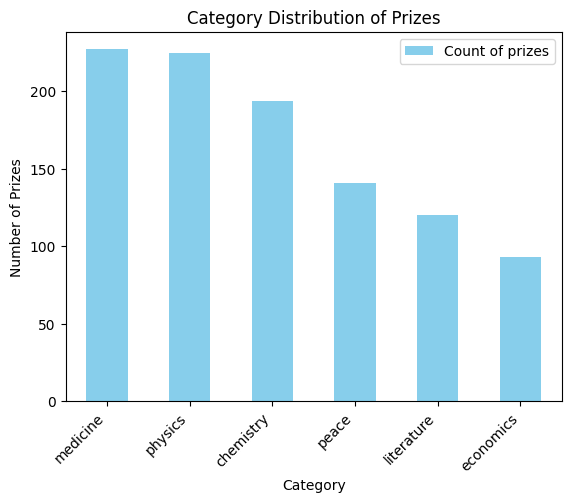

In [37]:
# Visualize Category Distribution with a Bar Plot
plt.figure(figsize=(10, 6))
category_distribution_df.plot(kind='bar', color='skyblue')
plt.title('Category Distribution of Prizes')
plt.xlabel('Category')
plt.ylabel('Number of Prizes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [38]:
# The data reveals the distribution of Nobel Prizes across categories, 
# with medicine, physics, and chemistry consistently receiving higher counts compared to literature, economics, and peace. 

#### Analysis 2: Yearly Trends

In [39]:
yearly_trends = df_prize.groupby('year').size()

# Find the most awarded year
most_awarded_year = yearly_trends.idxmax()

# Find the least awarded year
least_awarded_year = yearly_trends.idxmin()

print("Most Awarded Year:", most_awarded_year)
print("Least Awarded Year:", least_awarded_year)

Most Awarded Year: 2001
Least Awarded Year: 1916


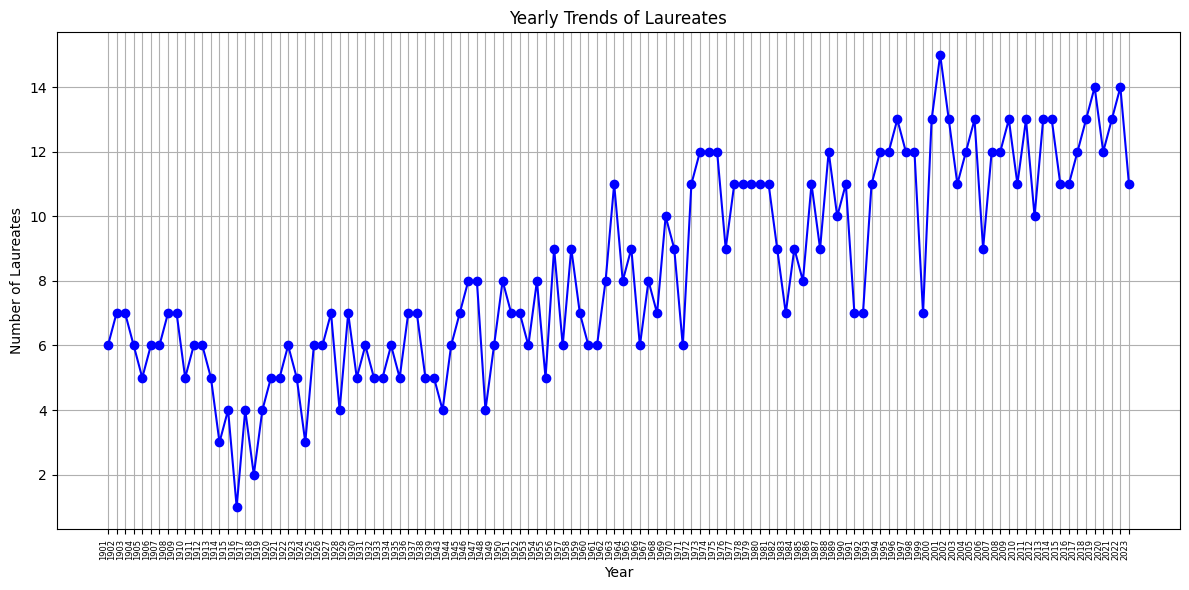

In [40]:
# Visualize Yearly Trends with a Line Plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linestyle='-', color='b', label='Number of Laureates')
plt.title('Yearly Trends of Laureates')
plt.xlabel('Year')
plt.ylabel('Number of Laureates')
plt.xticks(yearly_trends.index, rotation=90, ha='right', fontsize=6)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

plt.show()

#### Analysis 3: Share Distribution

In [41]:
share_distribution = df_prize['share'].value_counts()
share_distribution

share
1    358
2    331
3    237
4     74
Name: count, dtype: int64

In [42]:
# The "share" values indicate the distribution of Nobel Prizes among laureates, 
# with the majority (358) receiving a share of 1, followed by 331 laureates with a share of 2. 
# Relatively fewer laureates received higher shares, with 237 and 74 individuals having shares of 3 and 4, respectively. 

### 2. Process one collection of data and separate it into different categories and provided summary statistics on those categories. 

#### 1. Count of entries by born country: using df_laureates

In [43]:
# Exclude rows where 'bornCountry' is 'Unknown'
df_filtered = df_laureates[df_laureates['bornCountry'] != 'Unknown']

# Group by 'bornCountry' and 'gender' and calculate counts
country_gender_distribution = df_filtered.groupby(['bornCountry', 'gender']).size().unstack(fill_value=0)

# Calculate the 'Total' column
country_gender_distribution['Total'] = country_gender_distribution.sum(axis=1)

# Reset index for better display
country_gender_distribution = country_gender_distribution.reset_index()

# Rename the 'bornCountry' column to 'Country'
country_gender_distribution = country_gender_distribution.rename(columns={'bornCountry': 'Country'})

# Set 'Country' column as the index
country_gender_distribution = country_gender_distribution.set_index('Country')

# Rename columns for better clarity
country_gender_distribution.columns.name = None  # Remove the 'gender' as the columns name
country_gender_distribution.columns = ['Female', 'Male', 'Total']

# Sort the DataFrame by the 'Total' column in descending order
country_gender_distribution = country_gender_distribution.sort_values(by='Total', ascending=False)

# Display the DataFrame
country_gender_distribution

,Female,Male,Total
Country,,,
USA,17,272,289
United Kingdom,0,89,89
Germany,2,65,67
France,6,52,58
Sweden,2,28,30
...,...,...,...
Poland (now Belarus),0,1,1
Poland (now Lithuania),0,1,1
Poland (now Ukraine),0,1,1


In [44]:
# The United States (USA) has the highest count, with 289 laureates born there.
# Followed by the United Kingdom (89), Germany (67), and France (58).

In [45]:
# Exporting the result to CSV
country_gender_distribution.to_csv('output//country_gender_distribution.csv')

#### 2. Prize Distribution Summary for 10-Year Intervals: using df_prize

In [46]:
# Create a copy of the original DataFrame to avoid modifying it
df_prize_copy = df_prize.copy()

# Convert the 'year' column to datetime for better handling
df_prize_copy['year'] = pd.to_datetime(df_prize_copy['year'], errors='coerce')

# Extract year intervals for grouping
df_prize_copy['year_interval'] = pd.cut(df_prize_copy['year'].dt.year, bins=range(1900, 2031, 10), right=False, labels=[f"{start}-{start+9}" for start in range(1900, 2030, 10)])

# Group by year_interval and calculate summary statistics
prize_summary_statistics = df_prize_copy.groupby('year_interval').agg(
    total_prizes=pd.NamedAgg(column='category', aggfunc='count'),
    unique_categories=pd.NamedAgg(column='category', aggfunc='nunique')
).reset_index()

# Set the 'year_interval' column as the index
prize_summary_statistics = prize_summary_statistics.set_index('year_interval')

# Print the DataFrame
prize_summary_statistics

,total_prizes,unique_categories
year_interval,,
1900-1909,57,5
1910-1919,40,5
1920-1929,54,5
1930-1939,56,5
1940-1949,43,5
1950-1959,72,5
1960-1969,79,6
1970-1979,104,6
1980-1989,97,6


In [47]:
# The output shows the distribution of Nobel Prizes in different intervals of ten years. 
# Across these intervals, the total number of prizes awarded varied, reaching a peak in the 2000s. 
# Additionally, the number of unique prize categories remained relatively consistent, 
# suggesting a stable diversity in the fields recognized by the Nobel Committee over the years.

In [48]:
# Exporting the result to CSV
prize_summary_statistics.to_csv('output//prize_summary_statistics.csv')

#### 3. Frequent Laureates Prize Information: using df_prize

In [49]:
# Count the frequencies of laureate_id in df_prize
laureate_id_counts = df_prize['laureate_id'].value_counts()

# Filter laureate_ids with frequencies more than 1
frequent_laureates = laureate_id_counts[laureate_id_counts > 1].index

# Create a list to store data for the new DataFrame
data_list = []

# Iterate over frequent laureates
for laureate_id in frequent_laureates:
    # Select rows for the current laureate_id
    laureate_rows = df_prize[df_prize['laureate_id'] == laureate_id]
    
    # Extract unique categories and convert the year and category columns to strings without brackets
    unique_categories = ', '.join(laureate_rows['category'].unique())
    years = ', '.join(map(str, laureate_rows['year']))
    
    # Extract information for the new DataFrame
    data = {
        'laureate_id': laureate_id,
        'year': years,
        'category': unique_categories,
        'firstname': laureate_rows['firstname'].iloc[0],  
        'surname': laureate_rows['surname'].iloc[0],  
        'frequency': laureate_id_counts[laureate_id]  # Add a column for the frequency
    }
    
    # Append the data to the list
    data_list.append(data)

# Create the new DataFrame
frequent_laureates_df = pd.DataFrame(data_list)

# Print the new DataFrame
frequent_laureates_df


,laureate_id,year,category,firstname,surname,frequency
0,482,"1963, 1944, 1917",peace,International Committee of the Red Cross,-,3
1,217,"1962, 1954","peace, chemistry",Linus,Pauling,2
2,66,"1972, 1956",physics,John,Bardeen,2
3,6,"1911, 1903","chemistry, physics",Marie,Curie,2
4,515,"1981, 1954",peace,Office of the United Nations High Commissioner...,-,2
5,743,"2022, 2001",chemistry,Barry,Sharpless,2
6,222,"1980, 1958",chemistry,Frederick,Sanger,2


In [50]:
# The output provides information about laureates who have received Nobel Prizes more than once. 
# Notably, there are laureates, such as Linus Pauling and Marie Curie, 
# who have been awarded in different categories in different years.
# Additionally, the presence of the International Committee of the Red Cross suggests collective recognition.

In [51]:
# Exporting the result to CSV
frequent_laureates_df.to_csv('output//frequent_laureates_df.csv')

## Combining the two dataframes

In [52]:
# Let's view the dataframes again
df_laureates.head()

,id,firstname,surname,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year,age_at_death
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),Lennep (now Remscheid),Germany,Munich,male,1845,1923,77.0
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,Arnhem,the Netherlands,Unknown,male,1853,1928,74.0
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,Zonnemaire,the Netherlands,Amsterdam,male,1865,1943,78.0
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,Paris,France,Unknown,male,1852,1908,55.0
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,Paris,France,Paris,male,1859,1906,46.0


In [53]:
df_prize.head()

,year,category,laureate_id,firstname,surname,motivation,share
0,2023,chemistry,1029,Moungi,Bawendi,"""for the discovery and synthesis of quantum dots""",3
1,2023,chemistry,1030,Louis,Brus,"""for the discovery and synthesis of quantum dots""",3
2,2023,chemistry,1031,Aleksey,Yekimov,"""for the discovery and synthesis of quantum dots""",3
3,2023,economics,1034,Claudia,Goldin,"""for having advanced our understanding of wome...",1
4,2023,literature,1032,Jon,Fosse,"""for his innovative plays and prose which give...",1


In [54]:
# The two dataframes will be joined by the common column in both the dataframmes
# The common column is the id of the laureates
# In the dataframe df_prize the column is named as laureate_id
# In the dataframe df_laureates the column is named as id

In [55]:
# Merge the dataframes on the common columns
prize_laureate_df = pd.merge(df_prize, df_laureates, left_on='laureate_id', right_on='id')

# Rename the column to 'laureate_id'
prize_laureate_df = prize_laureate_df.rename(columns={'laureate_id': 'laureate_id'})

# Display the merged dataframe
prize_laureate_df.head()


,year,category,laureate_id,firstname_x,surname_x,motivation,share,id,firstname_y,surname_y,born,died,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year,age_at_death
0,2023,chemistry,1029,Moungi,Bawendi,"""for the discovery and synthesis of quantum dots""",3,1029,Moungi,Bawendi,NaT,NaT,France,Paris,Unknown,Unknown,male,1961,0,NaN
1,2023,chemistry,1030,Louis,Brus,"""for the discovery and synthesis of quantum dots""",3,1030,Louis,Brus,NaT,NaT,USA,"Cleveland, OH",Unknown,Unknown,male,1943,0,NaN
2,2023,chemistry,1031,Aleksey,Yekimov,"""for the discovery and synthesis of quantum dots""",3,1031,Aleksey,Yekimov,NaT,NaT,USSR (now Russia),Unknown,Unknown,Unknown,male,1945,0,NaN
3,2023,economics,1034,Claudia,Goldin,"""for having advanced our understanding of wome...",1,1034,Claudia,Goldin,NaT,NaT,USA,"New York, NY",Unknown,Unknown,female,1946,0,NaN
4,2023,literature,1032,Jon,Fosse,"""for his innovative plays and prose which give...",1,1032,Jon,Fosse,1959-09-29,NaT,Norway,Haugesund,Unknown,Unknown,male,1959,0,NaN


In [56]:
# Exclude unwanted columns
columns_to_exclude = ['id', 'firstname_y', 'surname_y', 'born', 'died', 'motivation']
prize_laureate_df = prize_laureate_df.drop(columns=columns_to_exclude)

# Rename the column to 'laureate_id'
prize_laureate_df = prize_laureate_df.rename(columns={'year': 'prize_year', 'firstname_x': 'firstname', 'surname_x': 'surname'})

prize_laureate_df.head()

,prize_year,category,laureate_id,firstname,surname,share,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year,age_at_death
0,2023,chemistry,1029,Moungi,Bawendi,3,France,Paris,Unknown,Unknown,male,1961,0,NaN
1,2023,chemistry,1030,Louis,Brus,3,USA,"Cleveland, OH",Unknown,Unknown,male,1943,0,NaN
2,2023,chemistry,1031,Aleksey,Yekimov,3,USSR (now Russia),Unknown,Unknown,Unknown,male,1945,0,NaN
3,2023,economics,1034,Claudia,Goldin,1,USA,"New York, NY",Unknown,Unknown,female,1946,0,NaN
4,2023,literature,1032,Jon,Fosse,1,Norway,Haugesund,Unknown,Unknown,male,1959,0,NaN


#### Calculating the age of the laureate when awarded 

In [57]:
# Convert 'birth_year' to numeric (in case it's not already) and handle errors
prize_laureate_df['prize_year'] = pd.to_numeric(prize_laureate_df['prize_year'], errors='coerce')

# Calculate the age at the time of receiving the prize
prize_laureate_df['age_at_prize'] = prize_laureate_df['prize_year'] - prize_laureate_df['birth_year']

# Display the modified dataframe
prize_laureate_df.head()


,prize_year,category,laureate_id,firstname,surname,share,bornCountry,bornCity,diedCountry,diedCity,gender,birth_year,death_year,age_at_death,age_at_prize
0,2023,chemistry,1029,Moungi,Bawendi,3,France,Paris,Unknown,Unknown,male,1961,0,NaN,62
1,2023,chemistry,1030,Louis,Brus,3,USA,"Cleveland, OH",Unknown,Unknown,male,1943,0,NaN,80
2,2023,chemistry,1031,Aleksey,Yekimov,3,USSR (now Russia),Unknown,Unknown,Unknown,male,1945,0,NaN,78
3,2023,economics,1034,Claudia,Goldin,1,USA,"New York, NY",Unknown,Unknown,female,1946,0,NaN,77
4,2023,literature,1032,Jon,Fosse,1,Norway,Haugesund,Unknown,Unknown,male,1959,0,NaN,64


In [58]:
# Calculate the age at the time of receiving the prize
prize_laureate_df['age_at_prize'] = prize_laureate_df['prize_year'] - prize_laureate_df['birth_year']

# Define bins and labels
bin_edges = [20, 30, 40, 50, 60, 70, 80, 90, 120]
bin_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Bin the age_at_prize column
prize_laureate_df['Age when awarded'] = pd.cut(prize_laureate_df['age_at_prize'], bins=bin_edges, labels=bin_labels, right=False)

# Filter out 'org' from the 'gender' column
prize_laureate_df = prize_laureate_df[prize_laureate_df['gender'] != 'org']

# Create a DataFrame for male and female counts
gender_age_counts = prize_laureate_df.groupby(['Age when awarded', 'gender']).size().unstack(fill_value=0)

# Rename the columns for better clarity
gender_age_counts.columns.name = None  # Remove the 'gender' as the columns name

# Calculate total count, male percentage, and female percentage
gender_age_counts['Total'] = gender_age_counts['female'] + gender_age_counts['male']
gender_age_counts['Male %'] = (gender_age_counts['male'] / gender_age_counts['Total'] * 100).round(2)
gender_age_counts['Female %'] = (gender_age_counts['female'] / gender_age_counts['Total'] * 100).round(2)

# Display the new DataFrame
gender_age_counts


,female,male,Total,Male %,Female %
Age when awarded,,,,,
20-29,1,1,2,50.00,50.00
30-39,7,41,48,85.42,14.58
40-49,7,151,158,95.57,4.43
50-59,21,222,243,91.36,8.64
60-69,11,267,278,96.04,3.96
70-79,11,169,180,93.89,6.11
80-89,6,49,55,89.09,10.91
90+,0,5,5,100.00,0.00


In [59]:
# The majority of Nobel Prize recipients are awarded in the age range of 50-69, with a peak in the 60-69 age group.
# The distribution indicates that Nobel Prizes are more skewed towards male laureates, especially in older age groups.

In [60]:
# Exporting the result to CSV
gender_age_counts.to_csv('output//gender_age_counts.csv')